In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from numpy import set_printoptions

In [3]:
df=pd.read_csv("data.csv")
df.head()

branch  ncust  customer  age  ed  employ  address  income  debtinc  \
0       3   3017     10012   28   2       7        2      44     17.7   
1       3   3017     10017   64   5      34       17     116     14.7   
2       3   3017     10030   40   1      20       12      61      4.8   
3       3   3017     10039   30   1      11        3      27     34.5   
4       3   3017     10069   25   1       2        2      30     22.4   

   creddebt  othdebt  default  
0      2.99     4.80        0  
1      5.05    12.00        0  
2      1.04     1.89        0  
3      1.75     7.56        0  
4      0.76     5.96        1

In [6]:
df.head()

branch  ncust  customer  age  ed  employ  address  income  debtinc  \
0       3   3017     10012   28   2       7        2      44     17.7   
1       3   3017     10017   64   5      34       17     116     14.7   
2       3   3017     10030   40   1      20       12      61      4.8   
3       3   3017     10039   30   1      11        3      27     34.5   
4       3   3017     10069   25   1       2        2      30     22.4   

   creddebt  othdebt  default  
0      2.99     4.80        0  
1      5.05    12.00        0  
2      1.04     1.89        0  
3      1.75     7.56        0  
4      0.76     5.96        1

In [7]:
df.dtypes

branch        int64
ncust         int64
customer      int64
age           int64
ed            int64
employ        int64
address       int64
income        int64
debtinc     float64
creddebt    float64
othdebt     float64
default       int64
dtype: object

In [8]:
df.shape

(1500, 12)

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   branch    1500 non-null   int64  
 1   ncust     1500 non-null   int64  
 2   customer  1500 non-null   int64  
 3   age       1500 non-null   int64  
 4   ed        1500 non-null   int64  
 5   employ    1500 non-null   int64  
 6   address   1500 non-null   int64  
 7   income    1500 non-null   int64  
 8   debtinc   1500 non-null   float64
 9   creddebt  1500 non-null   float64
 10  othdebt   1500 non-null   float64
 11  default   1500 non-null   int64  
dtypes: float64(3), int64(9)
memory usage: 140.8 KB


In [68]:
df["ed"].value_counts()

2    526
3    332
4    310
1    246
5     83
Name: ed, dtype: int64

In [55]:
def plot_scatter(a,b):
    plt.scatter(df[a], df[b])
    plt.show()

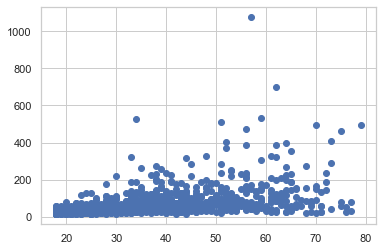

In [57]:
plot_scatter("age","income")

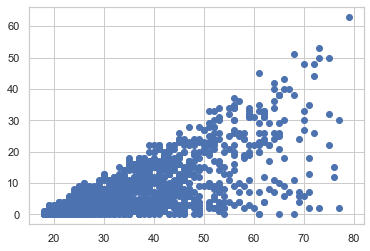

In [69]:
plot_scatter("age","employ")

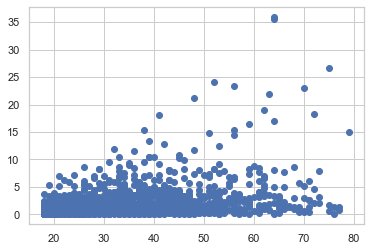

In [64]:
plot_scatter("age","creddebt")

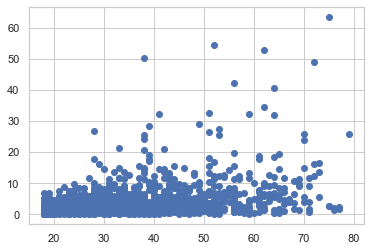

In [65]:
plot_scatter("age","othdebt")

In [61]:
df=df[df["income"]<1000]

In [62]:
df.shape

(1499, 12)

In [66]:
df=df[df["creddebt"]<35]

In [67]:
df.shape

(1497, 12)

In [54]:
df["age"].value_counts()

18    71
19    69
23    65
20    63
30    60
26    58
25    56
24    54
28    51
21    49
22    47
33    46
27    45
29    45
34    45
37    37
32    36
39    33
35    33
31    33
36    32
40    32
38    31
41    30
42    29
43    29
46    25
45    23
47    20
44    18
52    17
51    17
53    16
49    15
56    15
48    13
61    12
62    11
59    11
64    10
54    10
65     9
50     9
57     8
58     7
55     7
66     6
63     5
70     5
71     5
69     4
68     4
72     3
73     3
60     3
75     3
76     2
77     2
67     2
79     1
Name: age, dtype: int64

In [53]:
df["default"].value_counts()

0    952
1    548
Name: default, dtype: int64

In [9]:
df=df.dropna()

In [10]:
df.shape

(1500, 12)

In [11]:
df=df.astype({'default':int})


In [12]:
df['default'].value_counts()

0    952
1    548
Name: default, dtype: int64

In [13]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   branch    1500 non-null   int64  
 1   ncust     1500 non-null   int64  
 2   customer  1500 non-null   int64  
 3   age       1500 non-null   int64  
 4   ed        1500 non-null   int64  
 5   employ    1500 non-null   int64  
 6   address   1500 non-null   int64  
 7   income    1500 non-null   int64  
 8   debtinc   1500 non-null   float64
 9   creddebt  1500 non-null   float64
 10  othdebt   1500 non-null   float64
 11  default   1500 non-null   int64  
dtypes: float64(3), int64(9)
memory usage: 140.8 KB


In [71]:
df['sum_debts']=df['debtinc']+df['creddebt']+df['othdebt']

In [72]:
df.head(2)

branch  ncust  customer  age  ed  employ  address  income  debtinc  \
0       3   3017     10012   28   2       7        2      44     17.7   
1       3   3017     10017   64   5      34       17     116     14.7   

   creddebt  othdebt  default  sum_debts  
0      2.99      4.8        0      25.49  
1      5.05     12.0        0      31.75

In [16]:
df['avg_debts']=df['sum_debts']/3

In [17]:
df.head(2)

branch  ncust  customer  age  ed  employ  address  income  debtinc  \
0       3   3017     10012   28   2       7        2      44     17.7   
1       3   3017     10017   64   5      34       17     116     14.7   

   creddebt  othdebt  default  sum_debts  avg_debts  
0      2.99      4.8        0      25.49   8.496667  
1      5.05     12.0        0      31.75  10.583333

In [18]:
df['debt_income']=df['sum_debts']/df['income']

In [19]:
df.head()

branch  ncust  customer  age  ed  employ  address  income  debtinc  \
0       3   3017     10012   28   2       7        2      44     17.7   
1       3   3017     10017   64   5      34       17     116     14.7   
2       3   3017     10030   40   1      20       12      61      4.8   
3       3   3017     10039   30   1      11        3      27     34.5   
4       3   3017     10069   25   1       2        2      30     22.4   

   creddebt  othdebt  default  sum_debts  avg_debts  debt_income  
0      2.99     4.80        0      25.49   8.496667     0.579318  
1      5.05    12.00        0      31.75  10.583333     0.273707  
2      1.04     1.89        0       7.73   2.576667     0.126721  
3      1.75     7.56        0      43.81  14.603333     1.622593  
4      0.76     5.96        1      29.12   9.706667     0.970667

In [20]:
df['avg_debt_income']=df['avg_debts']/df['income']

In [21]:
df['debt_ed']=df['sum_debts']/df['ed']

In [22]:
df[df['ed']<0]

Empty DataFrame
Columns: [branch, ncust, customer, age, ed, employ, address, income, debtinc, creddebt, othdebt, default, sum_debts, avg_debts, debt_income, avg_debt_income, debt_ed]
Index: []

In [23]:
df['avg_debt_ed']=df['avg_debts']/df['ed']

In [24]:
df['sum_debtinc_creddebt']=df['debtinc']+df['creddebt']

In [25]:
df['avg_debtinc_creddebt']=df['sum_debtinc_creddebt']/2

In [26]:
df.columns

Index(['branch', 'ncust', 'customer', 'age', 'ed', 'employ', 'address',
       'income', 'debtinc', 'creddebt', 'othdebt', 'default', 'sum_debts',
       'avg_debts', 'debt_income', 'avg_debt_income', 'debt_ed', 'avg_debt_ed',
       'sum_debtinc_creddebt', 'avg_debtinc_creddebt'],
      dtype='object')

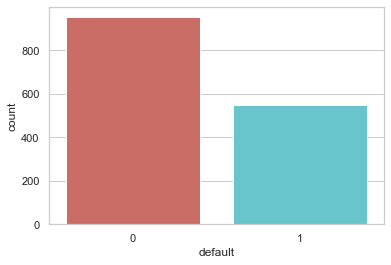

In [27]:
sns.countplot(x='default',data=df, palette='hls')
plt.show()

In [28]:
df.groupby('default').mean()

branch        ncust       customer        age        ed    employ  \
default                                                                         
0        51.527311  3468.922269  254391.799370  37.043067  2.569328  8.950630   
1        53.368613  3493.952555  263486.914234  29.189781  2.760949  3.479927   

          address     income    debtinc  creddebt   othdebt  sum_debts  \
default                                                                  
0        7.543067  64.317227   8.076891  1.512563  3.479590  13.069044   
1        4.155109  51.374088  13.147445  2.668631  4.477956  20.294033   

         avg_debts  debt_income  avg_debt_income   debt_ed  avg_debt_ed  \
default                                                                   
0         4.356348     0.284416         0.094805  6.599206     2.199735   
1         6.764678     0.506430         0.168810  8.715443     2.905148   

         sum_debtinc_creddebt  avg_debtinc_creddebt  
default                                              
0                    9.589454              4.794727  
1                   15.816077              7.908038

In [29]:
df.columns

Index(['branch', 'ncust', 'customer', 'age', 'ed', 'employ', 'address',
       'income', 'debtinc', 'creddebt', 'othdebt', 'default', 'sum_debts',
       'avg_debts', 'debt_income', 'avg_debt_income', 'debt_ed', 'avg_debt_ed',
       'sum_debtinc_creddebt', 'avg_debtinc_creddebt'],
      dtype='object')

In [4]:
X = df.loc[:, df.columns != 'default']
y = df.loc[:, df.columns == 'default']

In [74]:
X.columns

Index(['branch', 'ncust', 'customer', 'age', 'ed', 'employ', 'address',
       'income', 'debtinc', 'creddebt', 'othdebt', 'sum_debts'],
      dtype='object')

In [75]:
y.columns

Index(['default'], dtype='object')

In [5]:

from sklearn.feature_selection import RFE
model = LogisticRegression(solver='lbfgs')
rfe = RFE(model, 4)
fit = rfe.fit(X, y)
print("Num Features: %d" % fit.n_features_)
print("Selected Features: %s" % fit.support_)
print("Feature Ranking: %s" % fit.ranking_)

TypeError: __init__() takes 2 positional arguments but 3 were given

In [34]:
X.columns

Index(['branch', 'ncust', 'customer', 'age', 'ed', 'employ', 'address',
       'income', 'debtinc', 'creddebt', 'othdebt', 'sum_debts', 'avg_debts',
       'debt_income', 'avg_debt_income', 'debt_ed', 'avg_debt_ed',
       'sum_debtinc_creddebt', 'avg_debtinc_creddebt'],
      dtype='object')

In [6]:
import statsmodels.api as sm
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.458044
         Iterations 7
                          Results: Logit
Model:              Logit            Pseudo R-squared: 0.302      
Dependent Variable: default          AIC:              1396.1306  
Date:               2023-03-11 21:22 BIC:              1454.5760  
No. Observations:   1500             Log-Likelihood:   -687.07    
Df Model:           10               LL-Null:          -984.64    
Df Residuals:       1489             LLR p-value:      1.9316e-121
Converged:          1.0000           Scale:            1.0000     
No. Iterations:     7.0000                                        
--------------------------------------------------------------------
            Coef.    Std.Err.      z      P>|z|     [0.025    0.975]
--------------------------------------------------------------------
branch      0.2432     0.2692    0.9034   0.3663   -0.2844    0.7708
ncust      -0.0000     0.0001   -0.4181   0.6

In [36]:
X.columns

Index(['branch', 'ncust', 'customer', 'age', 'ed', 'employ', 'address',
       'income', 'debtinc', 'creddebt', 'othdebt', 'sum_debts', 'avg_debts',
       'debt_income', 'avg_debt_income', 'debt_ed', 'avg_debt_ed',
       'sum_debtinc_creddebt', 'avg_debtinc_creddebt'],
      dtype='object')

In [78]:
X = df.iloc[:, [5,8,9,12]]
y = df.loc[:, df.columns == 'default']

In [79]:
X.columns

Index(['employ', 'debtinc', 'creddebt', 'sum_debts'], dtype='object')

In [80]:
y

default
0           0
1           0
2           0
3           0
4           1
...       ...
1495        0
1496        0
1497        0
1498        0
1499        0

[1497 rows x 1 columns]

In [8]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

/Users/mohitkumar/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [9]:
y_pred = logreg.predict(X_test)
print(logreg.score(X_test,y_test))
#print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

0.7533333333333333


In [20]:
from sklearn import tree

In [17]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
import sklearn

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8)
dectree = DecisionTreeClassifier()
dectree.fit(X_train, y_train)

DecisionTreeClassifier()

In [13]:
y_pred = dectree.predict(X_test)
print(dectree.score(X_test,y_test))
#print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

0.7166666666666667


[Text(0.6063387158890845, 0.975, 'X[8] <= 10.05\ngini = 0.463\nsamples = 1200\nvalue = [764, 436]'), Text(0.3943822439847418, 0.925, 'X[5] <= 3.5\ngini = 0.358\nsamples = 710\nvalue = [544, 166]'), Text(0.26969171801643194, 0.875, 'X[8] <= 9.05\ngini = 0.467\nsamples = 372\nvalue = [234, 138]'), Text(0.16144916373239437, 0.825, 'X[3] <= 18.5\ngini = 0.45\nsamples = 333\nvalue = [219, 114]'), Text(0.03990610328638498, 0.775, 'X[8] <= 6.15\ngini = 0.496\nsamples = 35\nvalue = [16, 19]'), Text(0.023474178403755867, 0.725, 'X[8] <= 5.25\ngini = 0.472\nsamples = 21\nvalue = [13, 8]'), Text(0.018779342723004695, 0.675, 'X[2] <= 71575.5\ngini = 0.5\nsamples = 16\nvalue = [8, 8]'), Text(0.009389671361502348, 0.625, 'X[8] <= 4.55\ngini = 0.32\nsamples = 5\nvalue = [4, 1]'), Text(0.004694835680751174, 0.575, 'gini = 0.0\nsamples = 4\nvalue = [4, 0]'), Text(0.014084507042253521, 0.575, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'), Text(0.028169014084507043, 0.625, 'X[8] <= 2.65\ngini = 0.463\nsampl

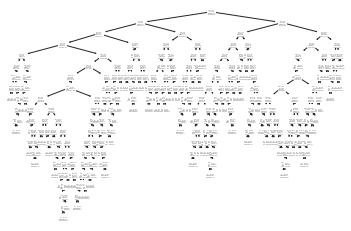

In [24]:
print(tree.plot_tree(dectree))

In [14]:

from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8)
randomforest = RandomForestClassifier()
randomforest.fit(X_train, y_train)

/var/folders/j0/2n97nj_x0j57brw2fbcryn5r0000gn/T/ipykernel_6323/3109808894.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  randomforest.fit(X_train, y_train)


RandomForestClassifier()

In [15]:
y_pred = randomforest.predict(X_test)
print(randomforest.score(X_test,y_test))
#print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

0.7433333333333333


In [42]:
y_pred

array([0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0])

In [43]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[114  13]
 [ 23  30]]


In [ ]:
140+21+26+38

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

In [45]:
print(logreg.score(X_test, y_test))

0.8


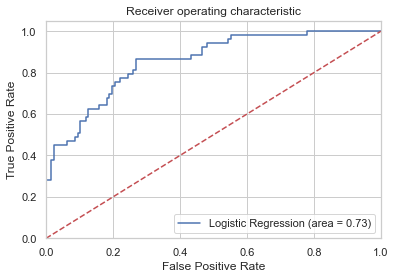

In [46]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [47]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.90      0.86       127
           1       0.70      0.57      0.62        53

    accuracy                           0.80       180
   macro avg       0.76      0.73      0.74       180
weighted avg       0.79      0.80      0.79       180



In [ ]:
precision    recall  f1-score   support

           0       0.85      0.88      0.86       106
           1       0.68      0.61      0.64        44

    accuracy                           0.80       150
   macro avg       0.76      0.75      0.75       150
weighted avg       0.80      0.80      0.80       150

In [ ]:
logreg.predict(X_test)

array([0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0,
       0, 1, 0, 1, 0])

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier

In [ ]:
model = ExtraTreesClassifier(n_estimators=10)
model.fit(X, y)
print(model.feature_importances_)

[0.055 0.053 0.07  0.107 0.057 0.114 0.089 0.079 0.167 0.127 0.084]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


In [ ]:
prediction = pd.DataFrame(y_pred, columns=['predictions'])

In [ ]:
prediction = pd.DataFrame(y_pred, columns=['predictions']).to_csv('prediction.csv')


In [ ]:
X_test=X_test.reset_index()

In [ ]:
X_test.head()

index  age  employ  income  debtinc  creddebt
0    471   26       1      39      2.0      0.33
1      9   21       0      23      3.9      0.31
2   1499   27       2      24      5.8      0.56
3     54   52       5      36      9.8      1.40
4   1411   26       6      24     11.5      0.91

In [ ]:
prediction=prediction.reset_index()

In [ ]:
prediction

index  predictions
0        0            0
1        1            0
2        2            0
3        3            0
4        4            0
..     ...          ...
220    220            0
221    221            1
222    222            0
223    223            1
224    224            0

[225 rows x 2 columns]

In [ ]:
y_test=y_test.reset_index()

In [ ]:
y_test

index  default
0      471        0
1        9        0
2     1499        0
3       54        0
4     1411        0
..     ...      ...
220    907        0
221    161        0
222    724        1
223    649        0
224    538        0

[225 rows x 2 columns]